<a href="https://colab.research.google.com/github/jcjimenezb123/PFM_PronosticoDemanda/blob/master/RecVta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reconstrucción de la venta

In [3]:
import pandas as pd
import numpy as np

##Crear el DataFrame con ventas aleatorias

In [4]:
#un año, 5,000 modelos, 10 tallas
365*4000*10
#18,250,000 por tienda

14600000

In [5]:
#se crean las ventas en un rango de [0,99] para 17 tiendas
df=pd.DataFrame(np.random.randint(0,100,(14600000,17)),columns=list('abcdefghijklmnopq'))
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14600000 entries, 0 to 14599999
Data columns (total 17 columns):
 #   Column  Dtype
---  ------  -----
 0   a       int64
 1   b       int64
 2   c       int64
 3   d       int64
 4   e       int64
 5   f       int64
 6   g       int64
 7   h       int64
 8   i       int64
 9   j       int64
 10  k       int64
 11  l       int64
 12  m       int64
 13  n       int64
 14  o       int64
 15  p       int64
 16  q       int64
dtypes: int64(17)
memory usage: 1.8 GB


In [4]:
df.head()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q
0,70,76,72,17,73,21,53,66,40,9,5,96,27,15,44,64,88
1,69,84,68,39,98,83,34,88,38,59,28,40,9,63,69,33,27
2,95,83,56,66,63,53,13,31,9,68,59,95,90,64,26,34,16
3,7,89,12,71,16,36,5,50,82,51,85,84,10,90,36,32,27
4,12,43,2,33,13,43,9,26,75,97,64,86,10,8,80,87,91


In [5]:
#Se agregan las columnas de id_art, talla y fecha
df['id_art']=0
df['talla']=0
df['fecha']=pd.Timestamp('2020-01-01')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14600000 entries, 0 to 14599999
Data columns (total 20 columns):
 #   Column  Dtype         
---  ------  -----         
 0   a       int64         
 1   b       int64         
 2   c       int64         
 3   d       int64         
 4   e       int64         
 5   f       int64         
 6   g       int64         
 7   h       int64         
 8   i       int64         
 9   j       int64         
 10  k       int64         
 11  l       int64         
 12  m       int64         
 13  n       int64         
 14  o       int64         
 15  p       int64         
 16  q       int64         
 17  id_art  int64         
 18  talla   int64         
 19  fecha   datetime64[ns]
dtypes: datetime64[ns](1), int64(19)
memory usage: 2.2 GB


In [6]:
#Se asignan los valores de los id_art, talla y fecha
r=0
for id in range(10000,14000):
  df['id_art'][r:r+3650] = id
  for t in range(22,32):
    df['talla'][r:r+365] = t
    df['fecha'][r:r+365] = pd.date_range(start='1/1/2020', periods=365, freq='D')
    r+=365

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [7]:
#se obtiene el dia de la semana
df['dia_semana'] = df['fecha'].dt.day_name()
#df['semana']=df['fecha'].dt.week
df['desde']=df['fecha'].dt.to_period('W').dt.start_time
df

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,id_art,talla,fecha,dia_semana,desde
0,70,76,72,17,73,21,53,66,40,9,5,96,27,15,44,64,88,10000,22,2020-01-01,Wednesday,2019-12-30
1,69,84,68,39,98,83,34,88,38,59,28,40,9,63,69,33,27,10000,22,2020-01-02,Thursday,2019-12-30
2,95,83,56,66,63,53,13,31,9,68,59,95,90,64,26,34,16,10000,22,2020-01-03,Friday,2019-12-30
3,7,89,12,71,16,36,5,50,82,51,85,84,10,90,36,32,27,10000,22,2020-01-04,Saturday,2019-12-30
4,12,43,2,33,13,43,9,26,75,97,64,86,10,8,80,87,91,10000,22,2020-01-05,Sunday,2019-12-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14599995,61,10,89,98,87,46,56,45,19,15,86,83,64,6,32,39,65,13999,31,2020-12-26,Saturday,2020-12-21
14599996,94,85,12,6,35,53,79,15,89,53,51,92,35,8,13,96,42,13999,31,2020-12-27,Sunday,2020-12-21
14599997,3,86,39,89,6,86,41,43,58,24,75,47,40,39,54,61,65,13999,31,2020-12-28,Monday,2020-12-28
14599998,29,91,63,63,23,4,91,29,82,23,92,78,97,70,38,47,12,13999,31,2020-12-29,Tuesday,2020-12-28


##Se analiza un modelo-talla

In [8]:
#se obtiene una mustra de un modelo talla
idtalla=df[(df['id_art']==10000) & (df['talla']==22)]
idtalla.sort_values(by=['fecha'],inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
import plotly.express as px

fig = px.line(idtalla, x="fecha", y="a")
fig.show()

In [10]:
fig = px.scatter(idtalla, x="fecha", y="a",marginal_y='histogram')
fig.show()

In [11]:
df.sort_values(by=['id_art','talla','dia_semana','fecha'],inplace=True)
df

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,id_art,talla,fecha,dia_semana,desde
2,95,83,56,66,63,53,13,31,9,68,59,95,90,64,26,34,16,10000,22,2020-01-03,Friday,2019-12-30
9,22,8,49,47,25,41,50,36,11,21,31,98,70,55,71,59,35,10000,22,2020-01-10,Friday,2020-01-06
16,2,5,25,86,64,0,28,99,23,39,95,15,45,76,11,58,76,10000,22,2020-01-17,Friday,2020-01-13
23,63,93,85,97,74,89,1,29,61,21,47,42,79,89,35,97,81,10000,22,2020-01-24,Friday,2020-01-20
30,26,10,84,53,26,19,74,72,63,4,30,52,29,69,65,81,36,10000,22,2020-01-31,Friday,2020-01-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14599971,59,21,31,99,11,26,22,93,29,72,23,73,36,82,6,6,45,13999,31,2020-12-02,Wednesday,2020-11-30
14599978,37,11,39,40,0,77,94,48,75,33,77,91,73,97,79,82,61,13999,31,2020-12-09,Wednesday,2020-12-07
14599985,67,93,94,61,56,86,97,78,24,80,35,10,91,99,85,26,42,13999,31,2020-12-16,Wednesday,2020-12-14
14599992,47,14,45,32,10,2,38,20,51,18,29,16,30,52,49,49,58,13999,31,2020-12-23,Wednesday,2020-12-21


##Se crean valores nulos aleatorios simulando los días negados

In [12]:
#se genera el 10% de negados por tienda
for c in range(17):
  inulos=np.random.randint(0,14600000,1460000)
  df.iloc[inulos,c]=np.nan

In [13]:
#se cuenta el total de negados generados
df.isna().sum().sum()

23618820

In [14]:
#Se observan los negados generados
df.head(30).style.applymap(lambda x: None if x==x else 'color: red')

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,id_art,talla,fecha,dia_semana,desde
2,95.000000,83.000000,56.000000,66.000000,63.000000,53.000000,13.000000,31.000000,9.000000,68.000000,59.000000,95.000000,90.000000,64.000000,26.000000,34.000000,16.000000,10000,22,2020-01-03 00:00:00,Friday,2019-12-30 00:00:00
9,22.000000,nan,49.000000,47.000000,25.000000,41.000000,50.000000,36.000000,11.000000,21.000000,31.000000,98.000000,70.000000,55.000000,71.000000,59.000000,35.000000,10000,22,2020-01-10 00:00:00,Friday,2020-01-06 00:00:00
16,nan,5.000000,25.000000,86.000000,64.000000,0.000000,28.000000,99.000000,23.000000,39.000000,95.000000,15.000000,45.000000,76.000000,11.000000,58.000000,76.000000,10000,22,2020-01-17 00:00:00,Friday,2020-01-13 00:00:00
23,63.000000,93.000000,85.000000,97.000000,74.000000,89.000000,1.000000,nan,61.000000,21.000000,47.000000,42.000000,79.000000,89.000000,35.000000,97.000000,81.000000,10000,22,2020-01-24 00:00:00,Friday,2020-01-20 00:00:00
30,26.000000,10.000000,84.000000,53.000000,26.000000,19.000000,74.000000,72.000000,63.000000,4.000000,30.000000,52.000000,29.000000,nan,65.000000,nan,36.000000,10000,22,2020-01-31 00:00:00,Friday,2020-01-27 00:00:00
37,13.000000,80.000000,71.000000,98.000000,36.000000,40.000000,98.000000,54.000000,63.000000,18.000000,69.000000,94.000000,nan,63.000000,42.000000,7.000000,82.000000,10000,22,2020-02-07 00:00:00,Friday,2020-02-03 00:00:00
44,84.000000,94.000000,18.000000,12.000000,76.000000,nan,17.000000,26.000000,89.000000,86.000000,64.000000,14.000000,97.000000,56.000000,45.000000,46.000000,8.000000,10000,22,2020-02-14 00:00:00,Friday,2020-02-10 00:00:00
51,45.000000,15.000000,nan,25.000000,87.000000,21.000000,99.000000,92.000000,nan,13.000000,13.000000,84.000000,70.000000,79.000000,36.000000,73.000000,nan,10000,22,2020-02-21 00:00:00,Friday,2020-02-17 00:00:00
58,23.000000,45.000000,62.000000,85.000000,45.000000,nan,66.000000,80.000000,54.000000,57.000000,18.000000,86.000000,nan,77.000000,88.000000,42.000000,16.000000,10000,22,2020-02-28 00:00:00,Friday,2020-02-24 00:00:00
65,54.000000,8.000000,24.000000,79.000000,60.000000,nan,87.000000,45.000000,60.000000,65.000000,53.000000,92.000000,19.000000,59.000000,75.000000,55.000000,8.000000,10000,22,2020-03-06 00:00:00,Friday,2020-03-02 00:00:00


In [15]:
idtalla=df[(df['id_art']==10000) & (df['talla']==22)]
idtalla.sort_values(by=['fecha'],inplace=True)
fig = px.line(idtalla, x="fecha", y="a")
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##Se reconstruye la venta usando el método de interpolación lineal

In [16]:
for t in 'abcdefghijklmnopq':
  df[t].interpolate(method='linear', limit_direction='forward',inplace=True)

##Se analiza el resultado

In [17]:
df.head(30)

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,id_art,talla,fecha,dia_semana,desde
2,95.00,83.0,56.0,66.0,63.0,53.0,13.0,31.0,9.0,68.000000,59.0,95.0,90.0,64.0,26.0,34.0,16.0,10000,22,2020-01-03,Friday,2019-12-30
9,22.00,44.0,49.0,47.0,25.0,41.0,50.0,36.0,11.0,21.000000,31.0,98.0,70.0,55.0,71.0,59.0,35.0,10000,22,2020-01-10,Friday,2020-01-06
16,42.50,5.0,25.0,86.0,64.0,0.0,28.0,99.0,23.0,39.000000,95.0,15.0,45.0,76.0,11.0,58.0,76.0,10000,22,2020-01-17,Friday,2020-01-13
23,63.00,93.0,85.0,97.0,74.0,89.0,1.0,85.5,61.0,21.000000,47.0,42.0,79.0,89.0,35.0,97.0,81.0,10000,22,2020-01-24,Friday,2020-01-20
30,26.00,10.0,84.0,53.0,26.0,19.0,74.0,72.0,63.0,4.000000,30.0,52.0,29.0,76.0,65.0,52.0,36.0,10000,22,2020-01-31,Friday,2020-01-27
37,13.00,80.0,71.0,98.0,36.0,40.0,98.0,54.0,63.0,18.000000,69.0,94.0,63.0,63.0,42.0,7.0,82.0,10000,22,2020-02-07,Friday,2020-02-03
44,84.00,94.0,18.0,12.0,76.0,30.5,17.0,26.0,89.0,86.000000,64.0,14.0,97.0,56.0,45.0,46.0,8.0,10000,22,2020-02-14,Friday,2020-02-10
51,45.00,15.0,40.0,25.0,87.0,21.0,99.0,92.0,71.5,13.000000,13.0,84.0,70.0,79.0,36.0,73.0,12.0,10000,22,2020-02-21,Friday,2020-02-17
58,23.00,45.0,62.0,85.0,45.0,29.0,66.0,80.0,54.0,57.000000,18.0,86.0,44.5,77.0,88.0,42.0,16.0,10000,22,2020-02-28,Friday,2020-02-24
65,54.00,8.0,24.0,79.0,60.0,37.0,87.0,45.0,60.0,65.000000,53.0,92.0,19.0,59.0,75.0,55.0,8.0,10000,22,2020-03-06,Friday,2020-03-02


In [18]:
idtalla=df[(df['id_art']==10000) & (df['talla']==22)]
idtalla.sort_values(by=['fecha'],inplace=True)
fig = px.line(idtalla, x="fecha", y="a")
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##Venta por modelo-semana

In [20]:
df

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,id_art,talla,fecha,dia_semana,desde
2,95.0,83.0,56.0,66.0,63.0,53.0,13.0,31.0,9.0,68.0,59.0,95.0,90.0,64.0,26.0,34.0,16.0,10000,22,2020-01-03,Friday,2019-12-30
9,22.0,44.0,49.0,47.0,25.0,41.0,50.0,36.0,11.0,21.0,31.0,98.0,70.0,55.0,71.0,59.0,35.0,10000,22,2020-01-10,Friday,2020-01-06
16,42.5,5.0,25.0,86.0,64.0,0.0,28.0,99.0,23.0,39.0,95.0,15.0,45.0,76.0,11.0,58.0,76.0,10000,22,2020-01-17,Friday,2020-01-13
23,63.0,93.0,85.0,97.0,74.0,89.0,1.0,85.5,61.0,21.0,47.0,42.0,79.0,89.0,35.0,97.0,81.0,10000,22,2020-01-24,Friday,2020-01-20
30,26.0,10.0,84.0,53.0,26.0,19.0,74.0,72.0,63.0,4.0,30.0,52.0,29.0,76.0,65.0,52.0,36.0,10000,22,2020-01-31,Friday,2020-01-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14599971,59.0,21.0,31.0,24.5,11.0,26.0,22.0,93.0,29.0,72.0,23.0,73.0,36.0,82.0,6.0,6.0,45.0,13999,31,2020-12-02,Wednesday,2020-11-30
14599978,37.0,11.0,39.0,40.0,0.0,77.0,94.0,48.0,75.0,33.0,77.0,91.0,73.0,97.0,79.0,82.0,61.0,13999,31,2020-12-09,Wednesday,2020-12-07
14599985,42.0,93.0,94.0,61.0,56.0,86.0,66.0,78.0,24.0,80.0,53.0,10.0,91.0,99.0,85.0,26.0,42.0,13999,31,2020-12-16,Wednesday,2020-12-14
14599992,47.0,14.0,45.0,32.0,10.0,2.0,38.0,20.0,51.0,18.0,29.0,12.0,30.0,52.0,49.0,49.0,58.0,13999,31,2020-12-23,Wednesday,2020-12-21


In [24]:
df2=df[['desde','id_art','a']]
df2

,desde,id_art,a
2,2019-12-30,10000,95.0
9,2020-01-06,10000,22.0
16,2020-01-13,10000,42.5
23,2020-01-20,10000,63.0
30,2020-01-27,10000,26.0
...,...,...,...
14599971,2020-11-30,13999,59.0
14599978,2020-12-07,13999,37.0
14599985,2020-12-14,13999,42.0
14599992,2020-12-21,13999,47.0


In [25]:
df2=df2.groupby(['id_art','desde']).sum().reset_index()
df2

,id_art,desde,a
0,10000,2019-12-30,2656.000000
1,10000,2020-01-06,3229.000000
2,10000,2020-01-13,2998.833333
3,10000,2020-01-20,3323.500000
4,10000,2020-01-27,3555.166667
...,...,...,...
211995,13999,2020-11-30,3762.500000
211996,13999,2020-12-07,3419.000000
211997,13999,2020-12-14,3008.000000
211998,13999,2020-12-21,3469.666667


In [26]:
df2[df2['id_art']==10000]

,id_art,desde,a
0,10000,2019-12-30,2656.000000
1,10000,2020-01-06,3229.000000
2,10000,2020-01-13,2998.833333
3,10000,2020-01-20,3323.500000
4,10000,2020-01-27,3555.166667
5,10000,2020-02-03,3485.000000
6,10000,2020-02-10,3402.000000
7,10000,2020-02-17,3236.750000
8,10000,2020-02-24,3323.500000
9,10000,2020-03-02,3153.750000


In [27]:
id=df2[df2['id_art']==10000]
id.sort_values(by=['desde'],inplace=True)

import plotly.express as px

fig = px.line(id, x="desde", y="a")
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##Pronostico de la demanda

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.holtwinters import ExponentialSmoothing

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [29]:
id=id.set_index('desde')
id

,id_art,a
desde,,
2019-12-30,10000,2656.000000
2020-01-06,10000,3229.000000
2020-01-13,10000,2998.833333
2020-01-20,10000,3323.500000
2020-01-27,10000,3555.166667
2020-02-03,10000,3485.000000
2020-02-10,10000,3402.000000
2020-02-17,10000,3236.750000
2020-02-24,10000,3323.500000


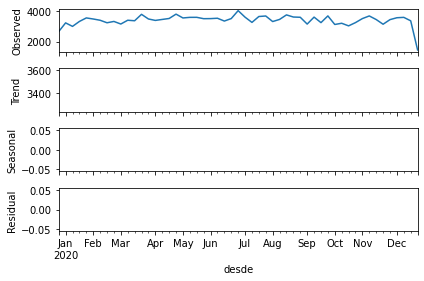

In [30]:
descomposicion = seasonal_decompose(id['a'],model='multiplicative')
descomposicion.plot();

###SMA - Simple Moving Averages

In [31]:
id['SMA_mes'] = id['a'].rolling(window=2).mean()
id['SMA_2mes'] = id['a'].rolling(window=3).mean()
id2=id[['a','SMA_mes','SMA_2mes']]
id2=id2.reset_index()
id2

,desde,a,SMA_mes,SMA_2mes
0,2019-12-30,2656.000000,NaN,NaN
1,2020-01-06,3229.000000,2942.500000,NaN
2,2020-01-13,2998.833333,3113.916667,2961.277778
3,2020-01-20,3323.500000,3161.166667,3183.777778
4,2020-01-27,3555.166667,3439.333333,3292.500000
5,2020-02-03,3485.000000,3520.083333,3454.555556
6,2020-02-10,3402.000000,3443.500000,3480.722222
7,2020-02-17,3236.750000,3319.375000,3374.583333
8,2020-02-24,3323.500000,3280.125000,3320.750000
9,2020-03-02,3153.750000,3238.625000,3238.000000


In [32]:
fig = px.line(id2, x='desde', y='a')
fig.add_scatter(x=id2['desde'], y=id2['SMA_mes'], mode='lines')
fig.add_scatter(x=id2['desde'], y=id2['SMA_2mes'], mode='lines')
fig.show()

###EWMA - Exponentially Weighted Moving Average

EWMA permite reducir el retraso al dar más peso a las lecturas o valores recientes. La cantidad de peso aplicado depende de los parámetros reales en el EWMA y el número de períodos dados en el tamaño de una ventana.

In [33]:
id2['ewma12'] = id2['a'].ewm(span=2,adjust=False).mean()
id2

,desde,a,SMA_mes,SMA_2mes,ewma12
0,2019-12-30,2656.000000,NaN,NaN,2656.000000
1,2020-01-06,3229.000000,2942.500000,NaN,3038.000000
2,2020-01-13,2998.833333,3113.916667,2961.277778,3011.888889
3,2020-01-20,3323.500000,3161.166667,3183.777778,3219.629630
4,2020-01-27,3555.166667,3439.333333,3292.500000,3443.320988
5,2020-02-03,3485.000000,3520.083333,3454.555556,3471.106996
6,2020-02-10,3402.000000,3443.500000,3480.722222,3425.035665
7,2020-02-17,3236.750000,3319.375000,3374.583333,3299.511888
8,2020-02-24,3323.500000,3280.125000,3320.750000,3315.503963
9,2020-03-02,3153.750000,3238.625000,3238.000000,3207.667988


In [34]:
fig = px.line(id2, x='desde', y='a')
fig.add_scatter(x=id2['desde'], y=id2['ewma12'], mode='lines')

fig.show()

###Suavizado exponencial de Holt-Winters

Ahora ajustaremos estos datos en suavizado exponencial simple, doble y triple respectivamente, y veremos cómo funciona.
Antes de comenzar con los modelos, primero definiremos el coeficiente de ponderación Alfa y el Período de tiempo. También establecemos la frecuencia de DateTime a un nivel mensual.

In [35]:
# Establezca la frecuencia del índice de fecha y hora como Inicio mensual 
id2.index.freq = 'D'
# Establezca el valor de Alpha y defina m (período de tiempo)
m = 365
alpha = 1/(2*m)

from statsmodels.tsa.holtwinters import SimpleExpSmoothing  

id2['HWES1'] = SimpleExpSmoothing(id2['a']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
id2

,desde,a,SMA_mes,SMA_2mes,ewma12,HWES1
0,2019-12-30,2656.000000,NaN,NaN,2656.000000,2656.000000
1,2020-01-06,3229.000000,2942.500000,NaN,3038.000000,2656.000000
2,2020-01-13,2998.833333,3113.916667,2961.277778,3011.888889,2656.784932
3,2020-01-20,3323.500000,3161.166667,3183.777778,3219.629630,2657.253491
4,2020-01-27,3555.166667,3439.333333,3292.500000,3443.320988,2658.166157
5,2020-02-03,3485.000000,3520.083333,3454.555556,3471.106996,2659.394925
6,2020-02-10,3402.000000,3443.500000,3480.722222,3425.035665,2660.525891
7,2020-02-17,3236.750000,3319.375000,3374.583333,3299.511888,2661.541609
8,2020-02-24,3323.500000,3280.125000,3320.750000,3315.503963,2662.329566
9,2020-03-02,3153.750000,3238.625000,3238.000000,3207.667988,2663.235279


In [36]:
fig = px.line(id2, x='desde', y='a')
fig.add_scatter(x=id2['desde'], y=id2['ewma12'], mode='lines')
fig.add_scatter(x=id2['desde'], y=id2['HWES1'], mode='lines')
fig.show()

In [37]:
id2['HWES2_ADD'] = ExponentialSmoothing(id2['a'],trend='add').fit().fittedvalues
id2['HWES2_MUL'] = ExponentialSmoothing(id2['a'],trend='mul').fit().fittedvalues
id2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



,desde,a,SMA_mes,SMA_2mes,ewma12,HWES1,HWES2_ADD,HWES2_MUL
0,2019-12-30,2656.000000,NaN,NaN,2656.000000,2656.000000,3165.817728,3202.277605
1,2020-01-06,3229.000000,2942.500000,NaN,3038.000000,2656.000000,3131.518266,3095.239314
2,2020-01-13,2998.833333,3113.916667,2961.277778,3011.888889,2656.784932,3181.316169,3117.440618
3,2020-01-20,3323.500000,3161.166667,3183.777778,3219.629630,2657.253491,3189.819325,3091.698116
4,2020-01-27,3555.166667,3439.333333,3292.500000,3443.320988,2658.166157,3243.627033,3132.519622
5,2020-02-03,3485.000000,3520.083333,3454.555556,3471.106996,2659.394925,3327.261205,3209.537569
6,2020-02-10,3402.000000,3443.500000,3480.722222,3425.035665,2660.525891,3392.947583,3258.527809
7,2020-02-17,3236.750000,3319.375000,3374.583333,3299.511888,2661.541609,3438.648773,3282.404480
8,2020-02-24,3323.500000,3280.125000,3320.750000,3315.503963,2662.329566,3452.052020,3270.344183
9,2020-03-02,3153.750000,3238.625000,3238.000000,3207.667988,2663.235279,3473.035138,3277.058929


In [38]:
fig = px.line(id2, x='desde', y='a')
fig.add_scatter(x=id2['desde'], y=id2['HWES2_ADD'], mode='lines')
fig.add_scatter(x=id2['desde'], y=id2['HWES2_MUL'], mode='lines')
fig.show()

In [39]:
id2['HWES3_ADD'] = ExponentialSmoothing(id2['a'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
id2['HWES3_MUL'] = ExponentialSmoothing(id2['a'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
id2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



,desde,a,SMA_mes,SMA_2mes,ewma12,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
0,2019-12-30,2656.000000,NaN,NaN,2656.000000,2656.000000,3165.817728,3202.277605,2681.020833,3042.603439
1,2020-01-06,3229.000000,2942.500000,NaN,3038.000000,2656.000000,3131.518266,3095.239314,3276.130656,3273.709480
2,2020-01-13,2998.833333,3113.916667,2961.277778,3011.888889,2656.784932,3181.316169,3117.440618,3065.224238,3131.593141
3,2020-01-20,3323.500000,3161.166667,3183.777778,3219.629630,2657.253491,3189.819325,3091.698116,3406.388126,3270.419419
4,2020-01-27,3555.166667,3439.333333,3292.500000,3443.320988,2658.166157,3243.627033,3132.519622,3651.897036,3377.832018
5,2020-02-03,3485.000000,3520.083333,3454.555556,3471.106996,2659.394925,3327.261205,3209.537569,3593.043730,3518.753377
6,2020-02-10,3402.000000,3443.500000,3480.722222,3425.035665,2660.525891,3392.947583,3258.527809,3518.969051,3416.787011
7,2020-02-17,3236.750000,3319.375000,3374.583333,3299.511888,2661.541609,3438.648773,3282.404480,3360.408808,3315.507889
8,2020-02-24,3323.500000,3280.125000,3320.750000,3315.503963,2662.329566,3452.052020,3270.344183,3451.774199,3380.609581
9,2020-03-02,3153.750000,3238.625000,3238.000000,3207.667988,2663.235279,3473.035138,3277.058929,3284.732439,3279.301617


In [40]:
fig = px.line(id2, x='desde', y='a')
fig.add_scatter(x=id2['desde'], y=id2['HWES3_ADD'], mode='lines')
fig.add_scatter(x=id2['desde'], y=id2['HWES3_MUL'], mode='lines')
fig.show()

In [41]:
train = id2[:40]
test = id2[40:]

In [42]:
fitted_model = ExponentialSmoothing(train['a'],trend='mul',seasonal='mul',seasonal_periods=24).fit()
test_predictions = fitted_model.forecast(12)
test_predictions

40    3708.123739
41    4016.073312
42    3756.452582
43    3803.255860
44    3811.780412
45    3722.799844
46    3734.403143
47    3766.629743
48    3535.670486
49    3689.834509
50    4185.836200
51    3717.694675
dtype: float64

In [43]:
test

,desde,a,SMA_mes,SMA_2mes,ewma12,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
40,2020-10-05,3124.000000,3405.916667,3352.500000,3272.503793,2698.981095,3495.644310,3489.039007,3332.124203,3349.153469
41,2020-10-12,3204.000000,3164.000000,3338.611111,3226.834598,2699.563313,3428.511988,3416.118924,3638.101166,3647.178096
42,2020-10-19,3032.666667,3118.333333,3120.222222,3097.389310,2700.254322,3377.197418,3372.311395,3539.310489,3544.525228
43,2020-10-26,3246.833333,3139.750000,3161.166667,3197.018659,2700.709682,3303.289587,3304.333900,3219.382619,3239.105788
44,2020-11-02,3512.000000,3379.416667,3263.833333,3407.006220,2701.457796,3267.387634,3290.001553,3320.307036,3330.880463
45,2020-11-09,3686.000000,3599.000000,3481.611111,3593.002073,2702.568128,3276.781635,3328.756658,3478.373292,3481.245637
46,2020-11-16,3448.500000,3567.250000,3548.833333,3496.667358,2703.915295,3315.999753,3393.152688,3409.422873,3410.604204
47,2020-11-23,3140.000000,3294.250000,3424.833333,3258.889119,2704.935274,3320.147632,3400.156687,3391.477653,3390.009754
48,2020-11-30,3443.333333,3291.666667,3343.944444,3381.851929,2705.531253,3278.614088,3347.244003,3024.520256,3056.384039
49,2020-12-07,3567.666667,3505.500000,3383.666667,3505.728421,2706.541941,3286.845265,3362.031727,3407.560452,3415.006303


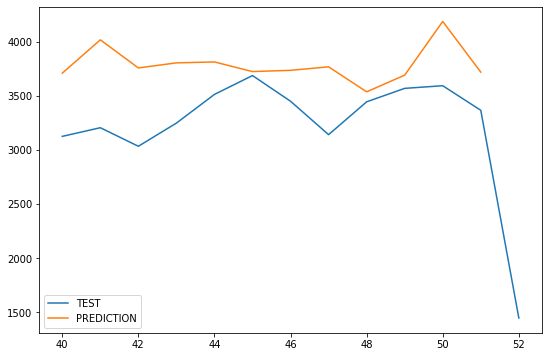

In [44]:
test['a'].plot(legend=True,label='TEST',figsize=(9,6))
test_predictions.plot(legend=True,label='PREDICTION')